# House Price Prediction — Week 1

**Linear Regression** on California Housing dataset.

This notebook is Colab-ready. It loads the dataset from `sklearn`, performs EDA, trains a linear regression model (with standardized features), evaluates (RMSE, R²), interprets coefficients, and saves model artifacts.

## Setup

Install dependencies (run on Colab if needed).

In [1]:
# If running on Google Colab, uncomment the next line to install any missing packages
# !pip install scikit-learn joblib matplotlib

import numpy as np
import pandas as pd
import os
import joblib
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Create artifacts directory
os.makedirs("artifacts", exist_ok=True)
print("Ready. Artifacts will be saved to ./artifacts/")

Ready. Artifacts will be saved to ./artifacts/


## Load Dataset & Quick EDA

In [2]:
# Load California Housing dataset from sklearn
data = fetch_california_housing(as_frame=True)
df = data.frame.copy()
df.rename(columns={'MedHouseVal': 'MedHouseVal'}, inplace=True)  # keep name consistent

print("Dataset shape:", df.shape)
display(df.head())
display(df.describe().T)

Dataset shape: (20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedHouseVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


## Correlation matrix (visual)

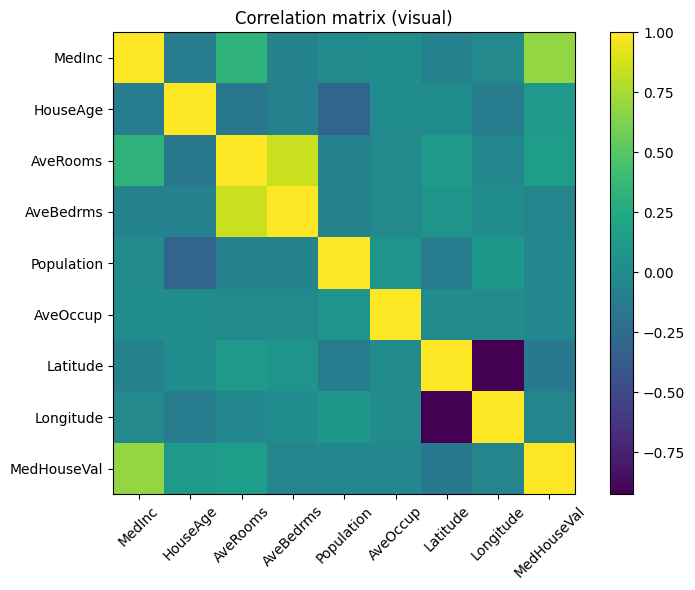

In [3]:
# Visualize correlation matrix using matplotlib (no seaborn)
corr = df.corr()
plt.figure(figsize=(8,6))
plt.imshow(corr, interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=45)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Correlation matrix (visual)")
plt.tight_layout()
plt.show()

## Feature selection, train/test split, and scaling

In [4]:
# Features and target
X = df.drop(columns=['MedHouseVal'])
y = df['MedHouseVal']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

# Scale features
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

Train shape: (16512, 8) Test shape: (4128, 8)


## Train Linear Regression

In [5]:
model = LinearRegression()
model.fit(X_train_s, y_train)
print("Model trained.")

Model trained.


## Evaluate model (RMSE & R²)

In [8]:
y_pred = model.predict(X_test_s)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R^2: {r2:.4f}")

Test RMSE: 0.7456
Test R^2: 0.5758


## Interpret coefficients

Coefficients correspond to standardized features (because of scaling). Larger absolute value → stronger effect.

In [9]:
coef_df = pd.DataFrame({
    'feature': X.columns,
    'coefficient': model.coef_
})
coef_df['abs_coef'] = coef_df['coefficient'].abs()
coef_df = coef_df.sort_values('abs_coef', ascending=False).drop(columns=['abs_coef'])
display(coef_df)

,feature,coefficient
6,Latitude,-0.896929
7,Longitude,-0.869842
0,MedInc,0.854383
3,AveBedrms,0.339259
2,AveRooms,-0.294410
1,HouseAge,0.122546
5,AveOccup,-0.040829
4,Population,-0.002308


## Example predictions (first 10 test samples)

In [10]:
sample = X_test.iloc[:10].copy().reset_index(drop=True)
sample_scaled = scaler.transform(sample)
sample_preds = model.predict(sample_scaled)

sample_results = sample.copy()
sample_results['actual_medhouseval'] = y_test.iloc[:10].values
sample_results['predicted_medhouseval'] = sample_preds
display(sample_results)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,actual_medhouseval,predicted_medhouseval
0,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01,0.47700,0.719123
1,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46,0.45800,1.764017
2,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44,5.00001,2.709659
3,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72,2.18600,2.838926
4,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93,2.78000,2.604657
5,4.7147,12.0,5.251483,0.975089,2400.0,2.846975,34.08,-117.61,1.58700,2.011754
6,5.0839,36.0,6.221719,1.095023,670.0,3.031674,33.89,-118.02,1.98200,2.645500
7,3.6908,38.0,4.962825,1.048327,1011.0,3.758364,33.92,-118.08,1.57500,2.168755
8,4.8036,4.0,3.924658,1.035959,1050.0,1.797945,37.39,-122.08,3.40000,2.740746
9,8.1132,45.0,6.879056,1.011799,943.0,2.781711,34.18,-118.23,4.46600,3.915615


## Save model & artifacts

In [11]:
# Save model, scaler, and CSV summaries to artifacts/
joblib.dump(model, "artifacts/linear_regression_model.pkl")
joblib.dump(scaler, "artifacts/scaler.pkl")

eval_df = pd.DataFrame({
    "metric": ["rmse", "r2"],
    "value": [rmse, r2]
})
eval_df.to_csv("artifacts/evaluation_summary.csv", index=False)
coef_df.to_csv("artifacts/coefficients.csv", index=False)
sample_results.to_csv("artifacts/sample_predictions.csv", index=False)

print("Saved artifacts to ./artifacts/:")
print("- linear_regression_model.pkl")
print("- scaler.pkl")
print("- evaluation_summary.csv")
print("- coefficients.csv")
print("- sample_predictions.csv")

Saved artifacts to ./artifacts/:
- linear_regression_model.pkl
- scaler.pkl
- evaluation_summary.csv
- coefficients.csv
- sample_predictions.csv


## Notes & Next steps

- Features are standardized before training. Coefficients reflect standardized feature effect sizes.
- To improve the model: try Ridge/Lasso regularization, tree-based models, or feature engineering.
- For reproducible runs in Colab: upload this notebook to Google Drive or run directly in Colab and download the `artifacts/` folder afterwards.